# Notes
Learnings from this lesson are documented here

* An image recongnizer can be used to classify the sounds/audio, took sounds, took waveforms pictures in the phone and used to classify the sounds \
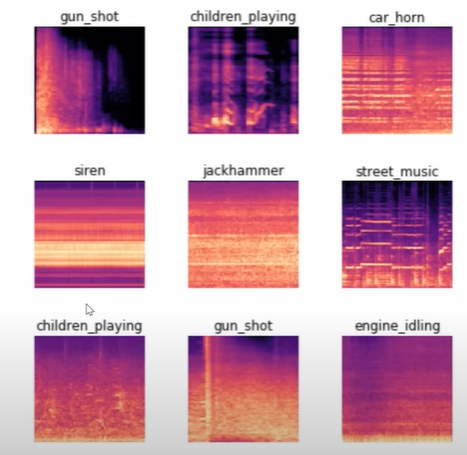

* pictures from the mouse movements are lines, dots are the clicks and speed of the movements is colours \
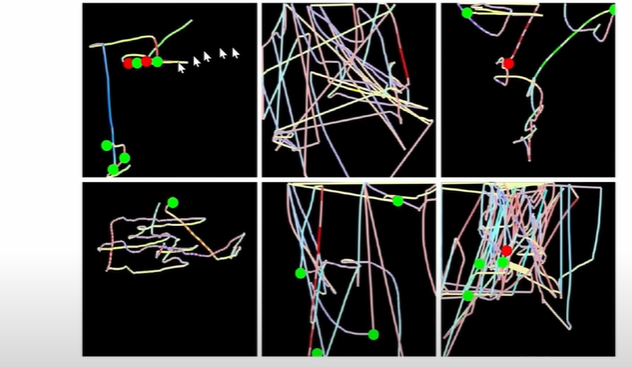

* Transfer Learning, used to train models on some data set and used to predict on some other dataset
* Fastai is library is on top of Pytorch, like Pandas on top of Numpy

* !pip list : is the bash command , starting with '!'

* Pix spy : to check the RGB colour code values for a given picture

* DATA BLOCK : It has everything at one place, what all data to go through, the labels, the data split for validation.

* **Traditional Programming vs ML Programming**\
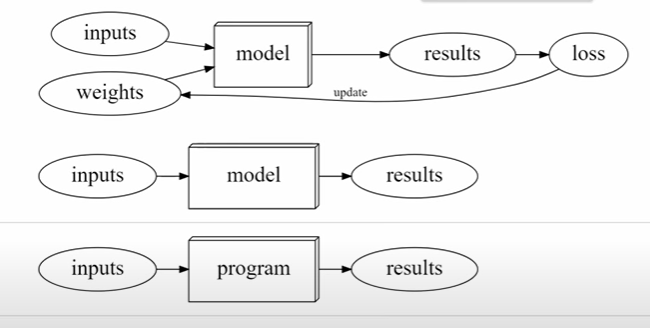

* **Metric vs Loss** : a metric is a function thtat measures quality of the models predictions; using the validation set. This is similar to the loss, which is also a measure of performance of the model. However , loss is meant ofr the optimization algorithm liks SGD to efficiently update the model paramets, while metrics are human-interpretable measures of perrformance.  Sometimes, a metric may also be a good choice for the loss.
* Overfitting : is the most challenging issue, it referes to when the model fits too closely to a limited set of data but does not generalize well to unseen data. the model can potentially memorize the dataset that the model was trained on and perform poorly on unseen data, this is why a proper validation framework is needed by splitting the data into training, validation, test sets.

* Hyperparameters: training models requires various other parameters that define how the model is trained for example we need to define how long we train for, or wht learning rate-how fast the model parameters are allowed to change is used.
* Architecture : is the template or structure of the model we are trying to fit. it defines the mathematical model we are trying to fit.
* Head of a model : when using a pretrained model, the later layers of the model, which were useful for the task that the model was originally trained on, are replaced with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. these new layers are called the head of the model

* blocks=ImageBlock, categoryBlock; the inputs to our model are images, and the outputs are categores ; in this case, bird or forest from the video example
* get_image_files ; to find all the inputs to the model , this will return all the image files in the given parent path
* splitter = random ;  from the given list of files a random split will be made into ex 70 - 30 ratio and the later part was kept for model validation

# Install required packages

In [1]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:

%pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# !pip install -Uqq torchvision
# !pip install  kaggle

# Libraries
## Below code runs in Kaggle

In [4]:
from duckduckgo_search import DDGS
from fastcore.all import * 


import pandas as pd

In [5]:
 
def search_images(term, max_images=30):
    global image_urls, search_results
    print(f"searching for '{term}'")
    
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)       
        image_urls = [result.get("image") for result in search_results[:max_images]]  
        # convert to L (functionally extended list class from fastai)
        return L(image_urls)

#     return L(DDGS(term, max_results=max_images)).itemgot('image')

In [6]:
# searching for a bird photo

urls = search_images('bird photos', max_images=10)
urls[0]

searching for 'bird photos'


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

In [7]:
image_urls

['https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg',
 'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg',
 'http://www.voidphase.com/media/2010/12/bird_gouldian_finch_1920.jpg',
 'https://wallpaperaccess.com/full/775987.jpg',
 'https://images.pexels.com/photos/97533/pexels-photo-97533.jpeg?cs=srgb&dl=animal-avian-bird-97533.jpg&fm=jpg',
 'http://hdqwalls.com/download/1/colorful-parrot-bird.jpg',
 'http://upload.wikimedia.org/wikipedia/commons/9/9b/Eastern_Bluebird-27527-2.jpg',
 'https://images.alphacoders.com/492/492674.jpg',
 'https://i2.wp.com/earthnworld.com/wp-content/uploads/2015/11/Blue-Jay.jpg?ssl=1',
 'http://upload.wikimedia.org/wikipedia/commons/5/54/Eastern_Bluebird-27527-7.jpg']

In [8]:
search_results[0]

{'title': '1000+ Beautiful Exotic Birds Photos · Pexels · Free Stock Photos',
 'image': 'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg',
 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.3hTkhdPZ8PRL3R6saGGNAgHaE7&pid=Api',
 'url': 'https://www.pexels.com/search/exotic birds/',
 'height': 1333,
 'width': 2000,
 'source': 'Bing'}

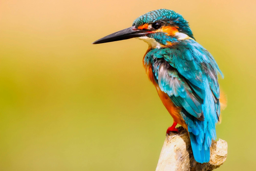

In [9]:
# download the URL and look 

from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

searching for 'forest photos'


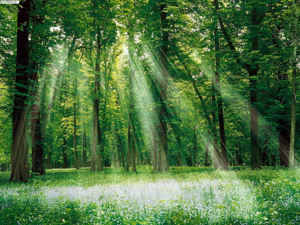

In [10]:
# same as above for forest

download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg', show_progress=True)
Image.open('forest.jpg').to_thumb(300,300)

In [11]:
searches = 'bird', 'forest'
path = Path('bird_or_not')

from time import sleep

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(5)
    
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(5)
    
    download_images(dest,urls=search_images(f'{o} shade photo'))
    sleep(5)
    
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'bird photo'


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


searching for 'bird sun photo'
searching for 'bird shade photo'
searching for 'forest photo'
searching for 'forest sun photo'
searching for 'forest shade photo'


In [12]:


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#4) [None,None,None,None]

In [13]:
failed

(#4) [Path('bird_or_not/bird/25181635-20e0-4a54-8f75-aadeedbeecf1.jpg'),Path('bird_or_not/bird/8aab0c56-2776-4934-947e-bdec65c6cc41.jpg'),Path('bird_or_not/bird/7b486827-5d72-49b8-8f3a-6438ab0fd832.jpg'),Path('bird_or_not/bird/ececa91a-a0e8-4d5f-8bce-8081829d136b.jpg')]

In [14]:
len(failed)

4

# MODEL TRAINING
to train a model, we need DATA LOADERS, which is an object that contiains a training set - the images used to create a model, and a validation set - the images used to check the accuracy of a model -- not used during training. 
In FASTAI we can create that easily using a DATABLOCK and view sample images from it :

In [15]:
ImageBlock

<function fastai.vision.data.ImageBlock(cls: 'PILBase' = <class 'fastai.vision.core.PILImage'>)>

In [16]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=143),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls=dls.dataloaders(path)



In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 113MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.056310,0.149261,0.060606,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.238590,0.082128,0.060606,00:16
1,0.156566,0.026487,0.000000,00:16
2,0.115927,0.013085,0.000000,00:16


In [18]:
birdie, _, probs = learn.predict(PILImage.create('bird.jpg'))
birdie, probs

('bird', tensor([1.0000e+00, 2.7633e-06]))

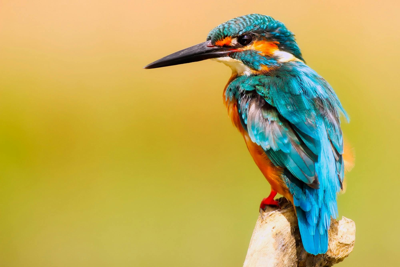

In [19]:
Image.open('bird.jpg').to_thumb(400,400)

# Proj1-Mercedes Benz ?

Aim of the project is to recognize whether a given vehicle is of Mercedes-Benz or not

In [20]:
# Data Part
# Data Loading
# ML Model
# ML Fine tune
# Classify an Image


benz = search_images(term='Mercedes Vehicles', max_images=10)
benz

searching for 'Mercedes Vehicles'


(#10) ['https://www.hdwallpapers.in/download/mercedes_benz_sls_amg_hd-1920x1200.jpg','https://images.hdqwalls.com/download/mercedes-benz-sls-amg-supercar-3840x2160.jpg','https://images.hdqwalls.com/wallpapers/black-mercedes-benz-amg-gt-4k-2020-m1.jpg','https://www.hdwallpapers.in/download/mercedes_amg_gt_r_2018_hd_4k-HD.jpg','https://luxurylaunches.com/wp-content/uploads/2015/09/Mercedes-Benz-Gelandewagen-G-Wagen-1.jpg','https://www.motortrend.com/uploads/sites/10/2021/01/2021-mercedes-benz-g-class-550-4wd-suv-angular-front.png','https://images.pexels.com/photos/810357/pexels-photo-810357.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260','https://www.hdwallpapers.in/download/black_mercedes_brabus_benz_glb_250_amg_line_2020_4k_hd_cars-HD.jpg','https://www.hdcarwallpapers.com/walls/mercedes_amg_gt_r_2017_4k-HD.jpg','https://ccnwordpress.blob.core.windows.net/journal/2019/06/2017-Mercedes-AMG-GLS63-9-source.jpg']

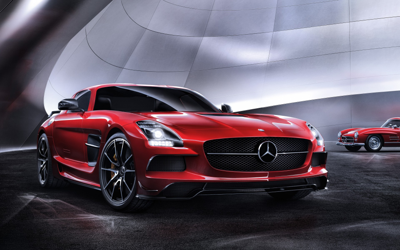

In [21]:
dest_benz = 'benz.jpg'
download_url(benz[0], dest_benz, show_progress=True)

Image.open(dest_benz).to_thumb(400,400)

In [22]:
searches = 'Mercedes Benz', 'Tata'
path = Path('Benz_or_not')

from time import sleep

for o in searches:
    dest = path/o
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} vehicle service photo'))
    sleep(5)
    
    download_images(dest, urls=search_images(f'{o} car photo'))
    sleep(5)
    
    download_images(dest,urls=search_images(f'{o} Buses photo'))
    sleep(5)
    
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'Mercedes Benz vehicle service photo'
searching for 'Mercedes Benz car photo'
searching for 'Mercedes Benz Buses photo'
searching for 'Tata vehicle service photo'
searching for 'Tata car photo'
searching for 'Tata Buses photo'


In [23]:
path

Path('Benz_or_not')

In [24]:

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

In [25]:
data_loaders = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=143),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=25)

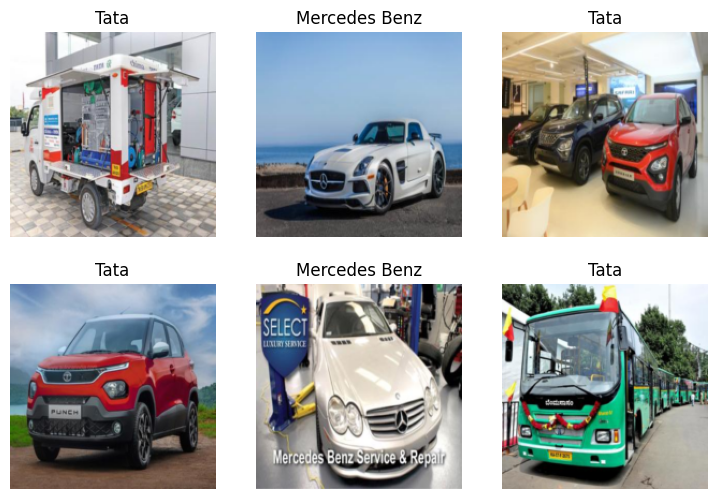

In [26]:
data_loaders.show_batch(max_n=6)

In [27]:
benz_model = vision_learner(data_loaders, resnet18, metrics=error_rate)

benz_model.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.401243,0.542193,0.181818,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.777930,0.382050,0.090909,00:14
1,0.589728,0.360900,0.121212,00:15
2,0.414922,0.410961,0.151515,00:14
3,0.316211,0.453266,0.181818,00:15


In [28]:
is_benz, _, probs = benz_model.predict(PILImage.create('benz.jpg'))
is_benz, probs

('Mercedes Benz', tensor([9.9904e-01, 9.6376e-04]))

In [29]:
error_rate

<function fastai.metrics.error_rate(inp, targ, axis=-1)>

# end 